In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Final_Dataset.csv')
df

,Unnamed: 0,Product_ASIN,URL,Title,Selling Price,MRP,Discount,Rating,Rating_Count,Category,Subcategory,Platform
0,0,B0085IATT6,https://www.amazon.in/dp/B0085IATT6?th=1&psc=1...,D-Link DIR-615 Wi-fi Ethernet-N300 Single_band...,999.0,1999.0,5.0,4.1,26489.0,Computers & Accessories > Networking Devices >...,Routers,Amazon
1,1,B00A0VCJPI,https://www.amazon.in/dp/B00A0VCJPI?th=1&psc=1...,TP-Link TL-WA850RE Single_Band 300Mbps RJ45 Wi...,1299.0,2499.0,48.0,4.1,196239.0,Computers & Accessories > Networking Devices >...,Wifi Extender,Amazon
2,2,B00D3GO8R4,https://www.amazon.in/dp/B00D3GO8R4?th=1&psc=1...,Tenda N301 Wireless-N300 Easy Setup Router (Wh...,999.0,1100.0,9.0,4.2,14068.0,Computers & Accessories > Networking Devices >...,Routers,Amazon
3,3,B00KXULGJQ,https://www.amazon.in/dp/B00KXULGJQ?th=1&psc=1...,TP-Link AC750 Wifi Range Extender | Up to 750M...,1799.0,5499.0,67.0,4.1,60946.0,Computers & Accessories > Networking Devices >...,Wifi Extender,Amazon
4,4,B00LWRFMLW,https://www.amazon.in/dp/B00LWRFMLW?th=1&psc=1...,Voltas Venture Slimline Tower AC (2 Ton White),82900.0,96990.0,15.0,3.0,2833.0,"Home & Kitchen > Heating, Cooling & Air Qualit...",Air Conditioners,Amazon
...,...,...,...,...,...,...,...,...,...,...,...,...
12445,12445,NaN,NaN,Samsung 330 L Frost Free Double Door 3 Star Co...,38990.0,56990.0,31.0,4.1,361400.0,NaN,Refrigerator,Flipkart
12446,12446,NaN,NaN,Samsung 236 L Frost Free Double Door 3 Star Co...,26990.0,41990.0,35.0,4.2,4.2,NaN,Refrigerator,Flipkart
12447,12447,NaN,NaN,Samsung 215 L Direct Cool Single Door 5 Star R...,19990.0,30999.0,35.0,4.2,107524.0,NaN,Refrigerator,Flipkart
12448,12448,NaN,NaN,Samsung 223 L Direct Cool Single Door 3 Star R...,17590.0,23999.0,26.0,4.1,58461.0,NaN,Refrigerator,Flipkart


In [3]:
df["Subcategory"].value_counts()

Subcategory
Mobile                    1769
Television                1134
Refrigerator              1112
Earphones                 1105
Air Conditioners           917
Smart Watch                852
Power Banks                723
Tablets                    615
Mobile Phones              611
Bluetooth Speaker          543
LED TVs                    423
RAM                        387
Motherboards               380
Hard Disk                  378
Speaker & Media Player     370
Routers                    290
Processors                 269
Drones                     221
Graphics Cards             193
Speakers                   103
Wifi Extender               55
Name: count, dtype: int64

In [4]:
df.columns

Index(['Unnamed: 0', 'Product_ASIN', 'URL', 'Title', 'Selling Price', 'MRP',
       'Discount', 'Rating', 'Rating_Count', 'Category', 'Subcategory',
       'Platform'],
      dtype='object')

In [5]:
columns_to_drop = ["Product_ASIN", "URL", "Category"]

df.drop(columns=columns_to_drop, inplace=True)

In [6]:
df.isna().sum()

Unnamed: 0       0
Title            1
Selling Price    0
MRP              0
Discount         0
Rating           4
Rating_Count     0
Subcategory      0
Platform         0
dtype: int64

In [7]:
df.dropna(subset=["Title"], inplace=True)

In [8]:
df.isna().sum()

Unnamed: 0       0
Title            0
Selling Price    0
MRP              0
Discount         0
Rating           4
Rating_Count     0
Subcategory      0
Platform         0
dtype: int64

In [9]:
df["Rating"] = pd.to_numeric(df["Rating"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")
df["Rating_Count"] = pd.to_numeric(df["Rating_Count"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")

In [10]:
# Fill Rating and Rating_Count with Subcategory median first, then overall median
df["Rating"] = df["Rating"].fillna(df.groupby("Subcategory")["Rating"].transform("median"))
df["Rating"] = df["Rating"].fillna(df["Rating"].median()) 

df["Rating_Count"] = df["Rating_Count"].fillna(df.groupby("Subcategory")["Rating_Count"].transform("median"))
df["Rating_Count"] = df["Rating_Count"].fillna(df["Rating_Count"].median()) 

In [11]:
df[["Rating", "Rating_Count"]].dtypes

Rating          float64
Rating_Count    float64
dtype: object

In [12]:
df.isnull().sum()

Unnamed: 0       0
Title            0
Selling Price    0
MRP              0
Discount         0
Rating           0
Rating_Count     0
Subcategory      0
Platform         0
dtype: int64

In [13]:
df.groupby("Platform")["Subcategory"].value_counts()

Platform  Subcategory           
Alibaba   Power Banks               629
          Refrigerator              482
          Television                377
          Earphones                 358
          Bluetooth Speaker         237
          Smart Watch               216
Amazon    Mobile                    959
          Earphones                 597
          Television                313
          Motherboards              212
          Hard Disk                 211
          Bluetooth Speaker         177
          RAM                       165
          Smart Watch               150
          Speakers                  103
          Drones                    102
          Air Conditioners          101
          Routers                    90
          Graphics Cards             82
          Tablets                    77
          Wifi Extender              23
          Processors                 18
          Power Banks                 2
Croma     Mobile Phones             611
       

In [14]:
df["Subcategory"] = df["Subcategory"].replace("Speaker & Media Player", "Speakers")

In [15]:
df.groupby("Platform")["Subcategory"].value_counts()

Platform  Subcategory      
Alibaba   Power Banks          629
          Refrigerator         482
          Television           377
          Earphones            358
          Bluetooth Speaker    237
          Smart Watch          216
Amazon    Mobile               959
          Earphones            597
          Television           313
          Motherboards         212
          Hard Disk            211
          Bluetooth Speaker    177
          RAM                  165
          Smart Watch          150
          Speakers             103
          Drones               102
          Air Conditioners     101
          Routers               90
          Graphics Cards        82
          Tablets               77
          Wifi Extender         23
          Processors            18
          Power Banks            2
Croma     Mobile Phones        611
          Refrigerator         439
          LED TVs              423
          Air Conditioners     417
          Speakers         

In [16]:
df["Subcategory"].value_counts()

Subcategory
Mobile               1769
Television           1134
Refrigerator         1112
Earphones            1105
Air Conditioners      917
Smart Watch           852
Power Banks           723
Tablets               615
Mobile Phones         611
Bluetooth Speaker     543
Speakers              473
LED TVs               423
RAM                   387
Motherboards          380
Hard Disk             378
Routers               290
Processors            268
Drones                221
Graphics Cards        193
Wifi Extender          55
Name: count, dtype: int64

In [17]:
df.columns

Index(['Unnamed: 0', 'Title', 'Selling Price', 'MRP', 'Discount', 'Rating',
       'Rating_Count', 'Subcategory', 'Platform'],
      dtype='object')

In [18]:
df.groupby("Platform")["Subcategory"].value_counts()

Platform  Subcategory      
Alibaba   Power Banks          629
          Refrigerator         482
          Television           377
          Earphones            358
          Bluetooth Speaker    237
          Smart Watch          216
Amazon    Mobile               959
          Earphones            597
          Television           313
          Motherboards         212
          Hard Disk            211
          Bluetooth Speaker    177
          RAM                  165
          Smart Watch          150
          Speakers             103
          Drones               102
          Air Conditioners     101
          Routers               90
          Graphics Cards        82
          Tablets               77
          Wifi Extender         23
          Processors            18
          Power Banks            2
Croma     Mobile Phones        611
          Refrigerator         439
          LED TVs              423
          Air Conditioners     417
          Speakers         

In [19]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Initialize and fit the encoder
le_subcat = LabelEncoder()
df['Subcategory_encoded'] = le_subcat.fit_transform(df['Subcategory'])

# Step 2: View the mapping (original category -> encoded value)
label_mapping = dict(zip(le_subcat.classes_, le_subcat.transform(le_subcat.classes_)))
print("Label Encoding Mapping for Sub Category:")
for k, v in label_mapping.items():
    print(f"{k}: {v}")



Label Encoding Mapping for Sub Category:
Air Conditioners: 0
Bluetooth Speaker: 1
Drones: 2
Earphones: 3
Graphics Cards: 4
Hard Disk: 5
LED TVs: 6
Mobile: 7
Mobile Phones: 8
Motherboards: 9
Power Banks: 10
Processors: 11
RAM: 12
Refrigerator: 13
Routers: 14
Smart Watch: 15
Speakers: 16
Tablets: 17
Television: 18
Wifi Extender: 19


In [20]:
from sklearn.model_selection import train_test_split

df = df.drop(columns=["Unnamed: 0"], errors='ignore')

df = df.dropna()

X = df[["Selling Price", "MRP", "Discount", "Rating", "Rating_Count", "Subcategory_encoded"]]
y = df["Platform"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
df.head()

,Title,Selling Price,MRP,Discount,Rating,Rating_Count,Subcategory,Platform,Subcategory_encoded
0,D-Link DIR-615 Wi-fi Ethernet-N300 Single_band...,999.0,1999.0,5.0,4.1,26489.0,Routers,Amazon,14
1,TP-Link TL-WA850RE Single_Band 300Mbps RJ45 Wi...,1299.0,2499.0,48.0,4.1,196239.0,Wifi Extender,Amazon,19
2,Tenda N301 Wireless-N300 Easy Setup Router (Wh...,999.0,1100.0,9.0,4.2,14068.0,Routers,Amazon,14
3,TP-Link AC750 Wifi Range Extender | Up to 750M...,1799.0,5499.0,67.0,4.1,60946.0,Wifi Extender,Amazon,19
4,Voltas Venture Slimline Tower AC (2 Ton White),82900.0,96990.0,15.0,3.0,2833.0,Air Conditioners,Amazon,0


In [22]:
print(X_train.dtypes)

Selling Price          float64
MRP                    float64
Discount               float64
Rating                 float64
Rating_Count           float64
Subcategory_encoded      int64
dtype: object


In [23]:
df[["Selling Price", "MRP", "Discount"]] = df[["Selling Price", "MRP", "Discount"]].replace('', np.nan)

In [24]:
for col in ["Selling Price", "MRP", "Discount"]:
    df[col] = df[col].replace('[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce') 

In [25]:
df = df.dropna(subset=["Selling Price", "MRP", "Discount", "Rating", "Rating_Count", "Subcategory"])

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

     Alibaba       0.95      0.95      0.95       455
      Amazon       0.91      0.92      0.91       691
       Croma       0.96      0.97      0.96       589
    Flipkart       0.93      0.91      0.92       755

    accuracy                           0.93      2490
   macro avg       0.94      0.94      0.94      2490
weighted avg       0.93      0.93      0.93      2490



In [27]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

Train Accuracy: 1.0000
Test Accuracy:  0.9345


In [28]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.47028112 0.68714859 0.69518072 0.7811245  0.60626758]
Mean CV accuracy: 0.6480005034198667


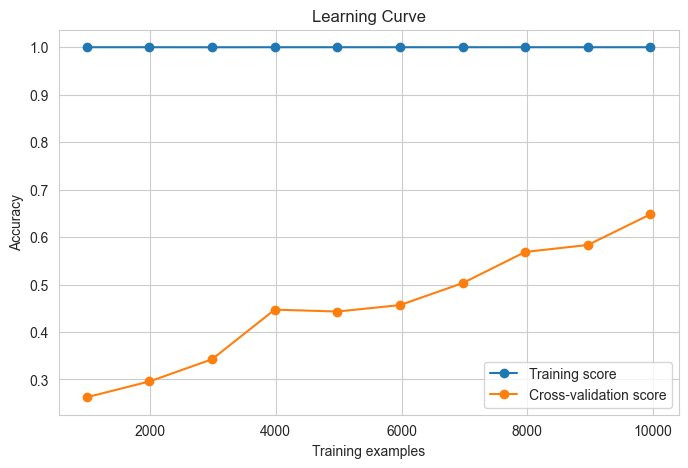

In [29]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Random Forest

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [31]:
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")


Train Accuracy: 0.9428
Test Accuracy:  0.9145


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.50441767 0.69959839 0.66666667 0.76827309 0.62073122]
Mean CV accuracy: 0.6519374081299082


In [33]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf)
print("Stratified CV Accuracy:", cv_scores)
print("Mean:", cv_scores.mean())

Stratified CV Accuracy: [0.9184739  0.92208835 0.92208835 0.92409639 0.91683407]
Mean: 0.92071621157188


<Axes: >

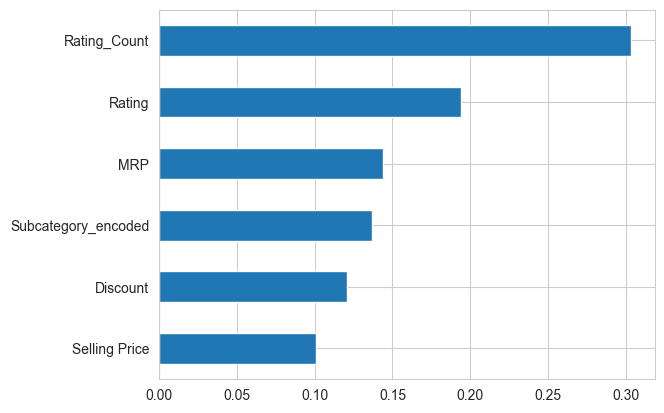

In [34]:
pd.Series(model.feature_importances_, index=X.columns).sort_values().plot(kind='barh')

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     Alibaba       0.92      0.94      0.93       455
      Amazon       0.92      0.87      0.90       691
       Croma       0.95      0.93      0.94       589
    Flipkart       0.88      0.92      0.90       755

    accuracy                           0.91      2490
   macro avg       0.92      0.92      0.92      2490
weighted avg       0.92      0.91      0.91      2490

[[428   8   5  14]
 [ 16 601   9  65]
 [ 12   8 550  19]
 [ 10  34  13 698]]


In [36]:
# # XG Boost

# import pandas as pd
# import numpy as np
# import xgboost as xgb
# import matplotlib.pyplot as plt

# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# from sklearn.metrics import classification_report, confusion_matrix


# le = LabelEncoder()
# y_encoded = le.fit_transform(y)  

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
# )

# model = xgb.XGBClassifier(
#     n_estimators=200,
#     max_depth=10,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='mlogloss'
# )

# model.fit(X_train, y_train)

# train_acc = model.score(X_train, y_train)
# test_acc = model.score(X_test, y_test)
# print(f"Train Accuracy: {train_acc:.4f}")
# print(f"Test Accuracy:  {test_acc:.4f}")

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores = cross_val_score(model, X, y_encoded, cv=skf)
# print("Stratified CV Accuracy:", cv_scores)
# print("Mean CV Accuracy:", cv_scores.mean())

# y_pred = model.predict(X_test)

# y_test_labels = le.inverse_transform(y_test)
# y_pred_labels = le.inverse_transform(y_pred)

# print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_labels))
# print("Confusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_labels))

# xgb.plot_importance(model, importance_type='gain', show_values=False, height=0.5)
# plt.title("Feature Importance (XGBoost)")
# plt.tight_layout()
# plt.show()


In [37]:
df.columns

Index(['Title', 'Selling Price', 'MRP', 'Discount', 'Rating', 'Rating_Count',
       'Subcategory', 'Platform', 'Subcategory_encoded'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:36:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Accuracy: 1.0000
Test Accuracy:  0.9506


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:36:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:36:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:36:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:36:52] WARN

Stratified CV Accuracy: [0.95140562 0.95823293 0.94899598 0.95823293 0.9513861 ]
Mean CV Accuracy: 0.9536507137428781

Classification Report:
               precision    recall  f1-score   support

     Alibaba       0.97      0.98      0.97       460
      Amazon       0.92      0.94      0.93       676
       Croma       0.97      0.97      0.97       593
    Flipkart       0.95      0.93      0.94       761

    accuracy                           0.95      2490
   macro avg       0.95      0.95      0.95      2490
weighted avg       0.95      0.95      0.95      2490

Confusion Matrix:
 [[449   4   5   2]
 [  2 636  10  28]
 [  9   4 575   5]
 [  3  47   4 707]]


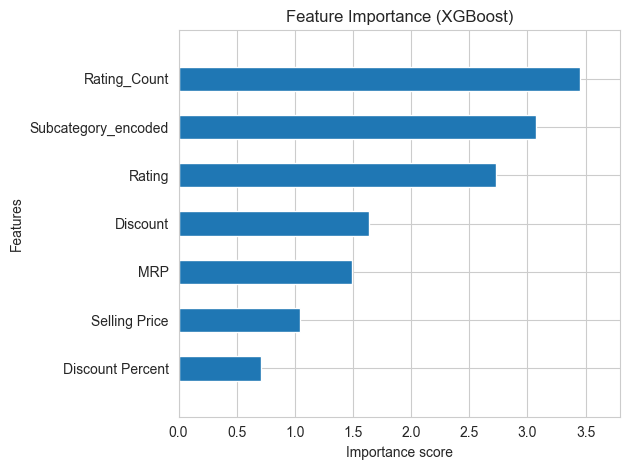

In [38]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Drop unnecessary columns and nulls
df = df.drop(columns=["Unnamed: 0"], errors='ignore')
df = df.dropna()

# # Encode Subcategory
# le_subcat = LabelEncoder()
# df['Subcategory_encoded'] = le_subcat.fit_transform(df['SubCategory'])

# Feature engineering
df['Discount'] = df['MRP'] - df['Selling Price']
df['Discount Percent'] = (df['Discount'] / df['MRP']).replace([np.inf, -np.inf], 0).fillna(0)

# Define features and target
features = ['Subcategory_encoded', 'Selling Price', 'MRP', 'Discount', 'Discount Percent', 'Rating', 'Rating_Count']
X = df[features]
y = df['Platform']

# Encode target
# Encode Platform label
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Model initialization
model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train
model.fit(X_train, y_train)

# Accuracy
print(f"Train Accuracy: {model.score(X_train, y_train):.4f}")
print(f"Test Accuracy:  {model.score(X_test, y_test):.4f}")

# CV accuracy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y_encoded, cv=skf)
print("Stratified CV Accuracy:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Prediction
y_pred = model.predict(X_test)
print("\nClassification Report:\n", classification_report(le_target.inverse_transform(y_test), le_target.inverse_transform(y_pred)))
print("Confusion Matrix:\n", confusion_matrix(le_target.inverse_transform(y_test), le_target.inverse_transform(y_pred)))

# Feature importance
xgb.plot_importance(model, importance_type='gain', show_values=False, height=0.5)
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()


In [39]:
df.columns

Index(['Title', 'Selling Price', 'MRP', 'Discount', 'Rating', 'Rating_Count',
       'Subcategory', 'Platform', 'Subcategory_encoded', 'Discount Percent'],
      dtype='object')

Validation 

In [40]:
def predict_platform(subcategory, product_name, selling_price, mrp, df_meta, model, le_subcat, le_target):
    """
    Predict platform based on SubCategory, Selling Price, MRP.
    Product Name is UI only (not used here).
    Rating & Rating_Count are estimated from df_meta by matching SubCategory and similar Selling Price.
    """
    import pandas as pd

    # Validate prices
    try:
        selling_price = float(selling_price)
        mrp = float(mrp)
        if mrp <= 0 or selling_price < 0:
            return "Invalid price values: MRP must be > 0 and Selling Price >= 0"
    except Exception as e:
        return f"Invalid numeric input: {e}"

    # Validate subcategory
    if subcategory not in le_subcat.classes_:
        return f"Unknown Subcategory: '{subcategory}'"

    # Encode subcategory
    subcat_encoded = le_subcat.transform([subcategory])[0]

    # Compute discount features
    discount = mrp - selling_price
    discount_percent = discount / mrp if mrp else 0

    # Filter meta data for same SubCategory (case-insensitive)
    match_df = df_meta[df_meta['Subcategory'].str.lower() == subcategory.lower()]

    if match_df.empty:
        return "No matching SubCategory found in dataset."

    # Narrow by Selling Price ±10%
    price_range = 0.10
    lower = selling_price * (1 - price_range)
    upper = selling_price * (1 + price_range)
    filtered = match_df[(match_df['Selling Price'] >= lower) & (match_df['Selling Price'] <= upper)]

    # Fallback if no close price matches
    if filtered.empty:
        filtered = match_df

    avg_rating = filtered['Rating'].mean()
    avg_rating_count = filtered['Rating_Count'].mean()

    # Prepare input DataFrame
    input_df = pd.DataFrame([{
        'Subcategory_encoded': subcat_encoded,
        'Selling Price': selling_price,
        'MRP': mrp,
        'Discount': discount,
        'Discount Percent': discount_percent,
        'Rating': avg_rating,
        'Rating_Count': avg_rating_count
    }])

    # Predict
    pred_encoded = model.predict(input_df)[0]
    pred_label = le_target.inverse_transform([pred_encoded])[0]

    return pred_label


In [41]:
df.tail(10)

,Title,Selling Price,MRP,Discount,Rating,Rating_Count,Subcategory,Platform,Subcategory_encoded,Discount Percent
12440,Voltas Beko by A Tata Product 626 L Frost Free...,90330.0,110590.0,20260.0,4.2,4.2,Refrigerator,Flipkart,13,0.183199
12441,Samsung 183 L Direct Cool Single Door 5 Star R...,17490.0,22999.0,5509.0,4.2,4.2,Refrigerator,Flipkart,13,0.239532
12442,Samsung 183 L Direct Cool Single Door 4 Star R...,16190.0,22999.0,6809.0,4.2,143239.0,Refrigerator,Flipkart,13,0.296056
12443,Samsung 183 L Direct Cool Single Door 3 Star R...,14690.0,18999.0,4309.0,4.1,87590.0,Refrigerator,Flipkart,13,0.226801
12444,Samsung 189 L Direct Cool Single Door 5 Star R...,17990.0,21999.0,4009.0,4.1,338806.0,Refrigerator,Flipkart,13,0.182236
12445,Samsung 330 L Frost Free Double Door 3 Star Co...,38990.0,56990.0,18000.0,4.1,361400.0,Refrigerator,Flipkart,13,0.315845
12446,Samsung 236 L Frost Free Double Door 3 Star Co...,26990.0,41990.0,15000.0,4.2,4.2,Refrigerator,Flipkart,13,0.357228
12447,Samsung 215 L Direct Cool Single Door 5 Star R...,19990.0,30999.0,11009.0,4.2,107524.0,Refrigerator,Flipkart,13,0.355140
12448,Samsung 223 L Direct Cool Single Door 3 Star R...,17590.0,23999.0,6409.0,4.1,58461.0,Refrigerator,Flipkart,13,0.267053
12449,Samsung 322 L Frost Free Double Door 3 Star Co...,37990.0,60990.0,23000.0,4.1,391860.0,Refrigerator,Flipkart,13,0.377111


In [37]:
# from sklearn.preprocessing import LabelEncoder

# le_subcat = LabelEncoder()
# le_subcat.classes_ = np.array(['Bluetooth Speaker', 'Bluetooth Speakers', 'Category','Earphones', 'Mobile', 'Power Banks',
#                                'Refrigenerator', 'Refrigenertor', 'Smart Watch','Smartwatch', 'Speakers', 'Television'])  

# # Make a prediction
# result = predict_new_input(
#     model=model,
#     # scaler=None,
#     le_platform=le,
#     le_subcat=le_subcat,
#     selling_price=3999.0,
#     mrp=5999.0,
#     discount=33,
#     rating=4.6,
#     rating_count=110,
#     sub_category='Smartwatch')

# print("Predicted Platform:", result)


In [48]:
df['Subcategory'].unique()

array(['Routers', 'Wifi Extender', 'Air Conditioners', 'Tablets',
       'Drones', 'RAM', 'Hard Disk', 'Processors', 'Motherboards',
       'Graphics Cards', 'Mobile Phones', 'Smart Watch', 'Speakers',
       'LED TVs', 'Refrigerator', 'Earphones', 'Bluetooth Speaker',
       'Power Banks', 'Mobile', 'Television'], dtype=object)

In [42]:
platform_result = predict_platform(
    subcategory="LED TVs", 
    product_name="nvidia 3050ti ",   # frontend only
    selling_price=78799,
    mrp=87899,
    df_meta=df,
    model=model,
    le_subcat=le_subcat,
    le_target=le_target
)

print("Predicted Platform:", platform_result)

Predicted Platform: Croma


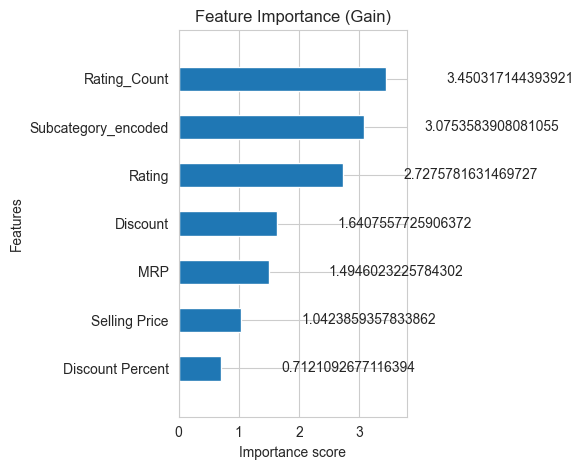

In [43]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance by gain
xgb.plot_importance(model, importance_type='gain', show_values=True, height=0.5)
plt.title("Feature Importance (Gain)")
plt.tight_layout()
plt.show()
